In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

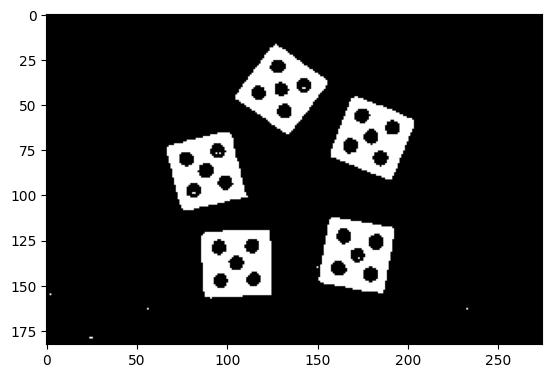

In [3]:
image = cv2.imread("input/dice1.png", cv2.IMREAD_GRAYSCALE)
image = 255 - image
_, image_thresh = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(image_thresh, cmap="gray")

In [4]:
contours, hierarchy = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [11,  4,  6, -1],
        [ 7, -1, -1,  5],
        [ 8,  6, -1,  5],
        [ 9,  7, -1,  5],
        [10,  8, -1,  5],
        [-1,  9, -1,  5],
        [18,  5, 12, -1],
        [13, -1, -1, 11],
        [14, 12, -1, 11],
        [16, 13, 15, 11],
        [-1, -1, -1, 14],
        [17, 14, -1, 11],
        [-1, 16, -1, 11],
        [27, 11, 19, -1],
        [21, -1, 20, 18],
        [-1, -1, -1, 19],
        [22, 19, -1, 18],
        [23, 21, -1, 18],
        [24, 22, -1, 18],
        [-1, 23, 25, 18],
        [26, -1, -1, 24],
        [-1, 25, -1, 24],
        [33, 18, 28, -1],
        [29, -1, -1, 27],
        [30, 28, -1, 27],
        [31, 29, -1, 27],
        [32, 30, -1, 27],
        [-1, 31, -1, 27],
        [-1, 27, 34, -1],
        [35, -1, -1, 33],
        [36, 34, -1, 33],
        [37, 35, -1, 33],
        [39, 36, 38, 33],
        [-1,

[5, 5, 5, 5, 5]


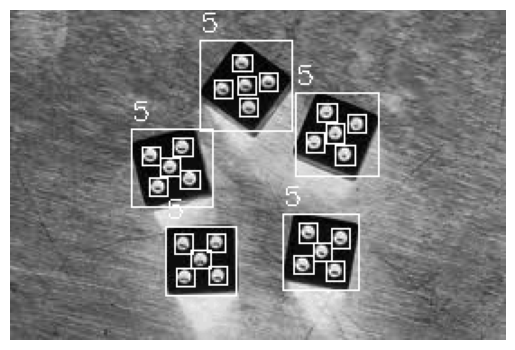

In [12]:
result = image.copy()
true_hierarch_index = []
output = []
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if 5 < w < result.shape[0]/1.5 and 5 < h < result.shape[1]/1.5:
        cv2.rectangle(result, (x,y), (x+w, y+h), (255, 255, 255), 1)
        true_hierarch_index.append(i)
        if hierarchy[0][i][3] == -1:
            score = 0
            child = hierarchy[0][i][2]
            while child != -1 and score < 6:
                score += 1
                child = hierarchy[0][child][0]
            cv2.putText(result, f'{score}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), thickness= 1)
            output.append(score)

print(output)
cv2.imwrite('output/dice1.png', result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
plt.axis('off')
plt.show()